In [1]:
#!pip install librosa
import librosa
#!pip install numpy
import numpy as np 
#!pip install matplotlib
import matplotlib.pyplot as plt 
from scipy import signal 
#!pip install sys
import sys
#!pip install wave
import wave
#!pip install math 
import math
#!sudo pip install contextlib 
import contextlib
# import custom data set from py in google drive
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.insert(0,'/content/drive/My Drive')
#from custom_dataset_sandbox import CustomMixture 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


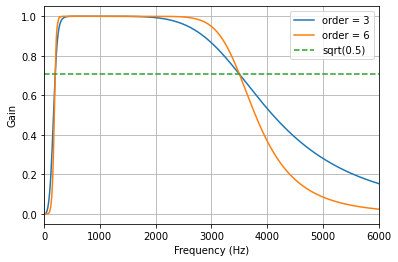

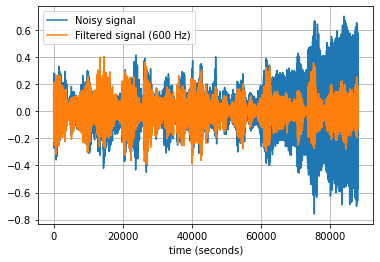

In [15]:
""" 
Filter out any noise outside of 200-3500 hz

"""

from scipy.signal import butter, lfilter
import librosa

audiofile, sr = librosa.load("/content/drive/MyDrive/democlips/overlay_with_noise.wav")


def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


if __name__ == "__main__":
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 22050.0*2
    lowcut = 200.0
    highcut = 3500.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, fs=fs, worN=2000)
        plt.plot(w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.xlim(0,6000)
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    #nsamples = T * fs
   # t = np.arange(0, nsamples) / fs
    a = 0.02
    # f0 = 600.0
    # x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    # x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    # x += a * np.cos(2 * np.pi * f0 * t + .11)
    # x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    # #x = 4000
    plt.figure(2)
    plt.clf()
    plt.plot(range(0, len(audiofile)), audiofile, label='Noisy signal')

    y = butter_bandpass_filter(audiofile, lowcut, highcut, fs, order=6)
    plt.plot(range(0,len(audiofile)), y, label='Filtered signal (%g Hz)' % f0)
    plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

In [ ]:
#  import matplotlib.pyplot as plt
#  import numpy as np
#  import wave
#  import sys
#  import math
#  import contextlib

# fname = '/content/drive/MyDrive/Filter/test2.wav'
# outname = '/content/drive/MyDrive/Filter/test2.4.wav'

# cutOffFrequency = 200 
# cutOffFrequency2 = 3500.0


# def running_mean(x, windowSize):
#   cumsum = np.cumsum(np.insert(x, 0, 0)) 
#   return (cumsum[windowSize:] - cumsum[:-windowSize]) / windowSize


# def interpret_wav(raw_bytes, n_frames, n_channels, sample_width, interleaved = True):

#     if sample_width == 1:
#         dtype = np.uint8 # unsigned char
#     elif sample_width == 2:
#         dtype = np.int16 # signed 2-byte short
#     else:
#         raise ValueError("Only supports 8 and 16 bit audio formats.")

#     channels = np.fromstring(raw_bytes, dtype=dtype)

#     if interleaved:
        
#         channels.shape = (n_frames, n_channels)
#         channels = channels.T
#     else:
        
#         channels.shape = (n_channels, n_frames)

#     return channels

# with contextlib.closing(wave.open(fname,'rb')) as spf:
#     sampleRate = spf.getframerate()
#     ampWidth = spf.getsampwidth()
#     nChannels = spf.getnchannels()
#     nFrames = spf.getnframes()

    
#     signal = spf.readframes(nFrames*nChannels)
#     spf.close()
#     channels = interpret_wav(signal, nFrames, nChannels, ampWidth, True)

#     freqRatio = (cutOffFrequency/sampleRate)
#     N = int(math.sqrt(0.196196 + freqRatio**2)/freqRatio)

#     freqRatio2 = (cutOffFrequency2/sampleRate)
#     N2 = int(math.sqrt(0.196196 + freqRatio2**2)/freqRatio2)
  

#     filtered = running_mean(channels[0], N2).astype(channels.dtype)
#     filtered2 = running_mean(channels[0],N).astype(channels.dtype)
#     wav_file = wave.open(outname, "w")
#     wav_file.setparams((1, ampWidth, sampleRate, nFrames, spf.getcomptype(), spf.getcompname()))
#     wav_file.writeframes(filtered.tobytes('C'))
#     wav_file.close()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


In [16]:
import soundfile as sf 
sf.write("/content/drive/MyDrive/democlips/overlay_with_noise_filtered.wav", y, sr)